In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import plotly.graph_objects as go


In [14]:
# Set the working directory
os.chdir(r"D:\Benson\aUpWork\Douglas Backtester Algo\Backtester Algorithm\Data")

In [15]:
# Load the CSV file
file_path = r"YMAX ETF Stock Price History.csv"
YMAX = pd.read_csv(file_path)

# Display the first few rows
YMAX.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,01/28/2025,16.72,16.57,16.73,16.33,950.74K,1.95%
1,01/27/2025,16.40,16.44,16.62,16.23,2.56M,-2.90%
2,01/24/2025,16.89,17.00,17.08,16.86,1.39M,-0.41%
3,01/23/2025,16.96,16.80,16.97,16.77,1.03M,-0.41%
4,01/22/2025,17.03,17.04,17.09,16.97,1.47M,0.89%


In [16]:
# Load the CSV file
file_path = r"YMAG ETF Stock Price History.csv"
YMAG = pd.read_csv(file_path)

# Display the first few rows
YMAG.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,01/28/2025,18.81,18.48,18.83,18.35,933.82K,2.28%
1,01/27/2025,18.39,18.27,18.53,18.18,1.25M,-2.85%
2,01/24/2025,18.93,19.00,19.07,18.83,848.88K,-0.05%
3,01/23/2025,18.94,18.94,18.97,18.85,585.19K,-0.63%
4,01/22/2025,19.06,18.94,19.09,18.90,622.02K,0.85%


In [17]:
#Convert dates to their right format in both YMAX and YMAG DataFrames
YMAG['Date'] = pd.to_datetime(YMAG['Date'])
YMAX['Date'] = pd.to_datetime(YMAX['Date'])
YMAX = YMAX.set_index('Date')
YMAG = YMAG.set_index('Date')


In [18]:
# Drop columns Vol and Change in both YMAX and YMAG DataFrames
YMAX = YMAX.drop(columns=['Vol.', 'Change %'])
YMAG = YMAG.drop(columns=['Vol.', 'Change %'])

In [19]:
#View the first few rows of the YMAX DataFrame
YMAX.head()

,Price,Open,High,Low
Date,,,,
2025-01-28,16.72,16.57,16.73,16.33
2025-01-27,16.40,16.44,16.62,16.23
2025-01-24,16.89,17.00,17.08,16.86
2025-01-23,16.96,16.80,16.97,16.77
2025-01-22,17.03,17.04,17.09,16.97


In [24]:
#View the first few rows of the YMAG DataFrame
YMAG.head()

,YMAG
Date,
2025-01-28,18.81
2025-01-27,18.39
2025-01-24,18.93
2025-01-23,18.94
2025-01-22,19.06


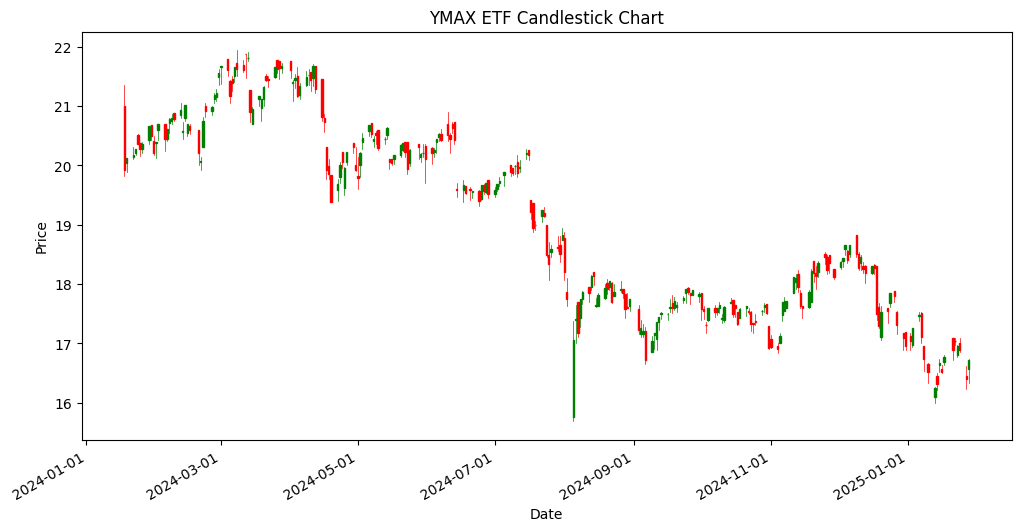

In [20]:
# Convert Date index to datetime format
YMAX.index = pd.to_datetime(YMAX.index)

# Convert dates to numerical format for matplotlib
YMAX['Date'] = YMAX.index.map(mdates.date2num)

# Select required columns for candlestick_ohlc
ohlc = YMAX[['Date', 'Open', 'High', 'Low', 'Price']].copy()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Format the x-axis dates to avoid clutter
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto-adjust date intervals
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as YYYY-MM-DD

# Plot the candlestick chart
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red')

# Labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('YMAX ETF Candlestick Chart')

# Rotate x-axis labels for better readability
fig.autofmt_xdate()

# Show the plot
plt.show()


In [21]:
# Convert index to datetime if it's not already
YMAX.index = pd.to_datetime(YMAX.index)

# Create a Plotly Candlestick Chart
fig = go.Figure(data=[
    go.Candlestick(
        x=YMAX.index,  # X-axis: Date
        open=YMAX['Open'], 
        high=YMAX['High'],
        low=YMAX['Low'], 
        close=YMAX['Price'],
        increasing_line_color='green', 
        decreasing_line_color='red'
    )
])

# Customize Layout
fig.update_layout(
    title="YMAX ETF Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis_rangeslider_visible=False,  # Hide range slider
    template="plotly_dark",  # Optional: dark theme
)

# Show the interactive chart
fig.show()


In [22]:
# Convert index to datetime if it's not already
YMAG.index = pd.to_datetime(YMAG.index)

# Create a Plotly Candlestick Chart
fig = go.Figure(data=[
    go.Candlestick(
        x=YMAG.index,  # X-axis: Date
        open=YMAG['Open'], 
        high=YMAG['High'],
        low=YMAG['Low'], 
        close=YMAG['Price'],
        increasing_line_color='green', 
        decreasing_line_color='red'
    )
])

# Customize Layout
fig.update_layout(
    title="YMAG ETF Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis_rangeslider_visible=False,  # Hide range slider
    template="plotly_dark",  # Optional: dark theme
)

# Show the interactive chart
fig.show()


In [23]:
# Drop Open high low columns and rename Price to YMAX in YMAX Dataframe
YMAX = YMAX.drop(columns=['Open', 'High', 'Low']).rename(columns={'Price': 'YMAX'})

# Drop Open high low columns and rename Price to YMAG in YMAG Dataframe
YMAG = YMAG.drop(columns=['Open', 'High', 'Low']).rename(columns={'Price': 'YMAG'})

# Merge Both Dataframes on the Date Index
merged_df = pd.merge(YMAX, YMAG, left_index=True, right_index=True, how='inner')

merged_df

,YMAX,Date,YMAG
Date,,,
2025-01-28,16.72,20116.0,18.81
2025-01-27,16.40,20115.0,18.39
2025-01-24,16.89,20112.0,18.93
2025-01-23,16.96,20111.0,18.94
2025-01-22,17.03,20110.0,19.06
...,...,...,...
2024-02-06,20.61,19759.0,20.20
2024-02-05,20.44,19758.0,20.19
2024-02-02,20.70,19755.0,20.30
